In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import wordcloud
from wordcloud import WordCloud
import nltk

In [2]:
import source
import ngrams
import roberta

In [3]:
filename = "CSW8 (S22) Reflection (Week 8) (Responses).xlsx"

In [4]:
df = pd.read_excel(filename)
df.fillna("None", inplace=True)
df = df.astype(str)

In [5]:
print(df.columns)

Index(['Timestamp', 'Email Address',
       'How do you feel about the material this week?',
       'Give a **specific** example/problem that you found difficult this week and explain _what_ made it challenging. ==>>> Tell us: what did you do to solve it? (Write `None` if this week's material was clear.)',
       'Which zyBooks topic this week did you find to be the easiest?',
       ' Did you encounter any counterintuitive concepts this week? Was there anything that didn't behave in a way that you predicted it should? (Write `None` if nothing surprised you.)',
       'What was particularly helpful for you in class this week?',
       'What do you think about the Grades System mini-project?',
       'In what ways do you recognize this week's mini-project relating to the previous weeks' contents? Please tell us how many different connections you noticed.',
       'Which lab session did you attend on Wednesday?',
       'Any feedback about the lab session this week?',
       'Are they ge

## General exploration
### What questions have constatnt set of answers?

How do you feel about the material this week?


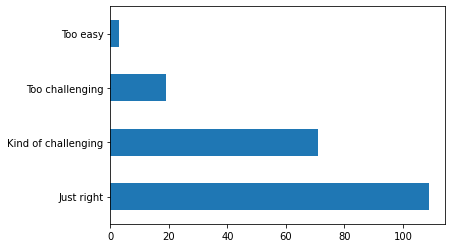

Which lab session did you attend on Wednesday?


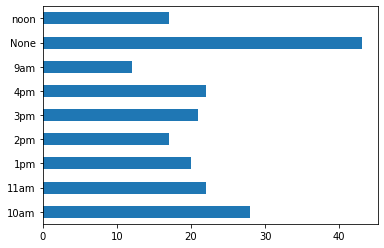

Are they getting necessary help from mentors during lab sessions and office hours?


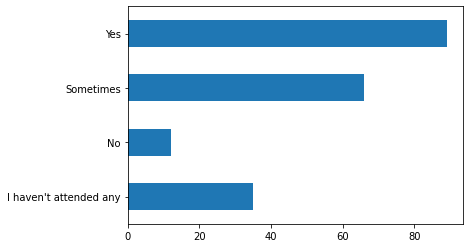

Mental Health Check-in: How are you doing this week (in general, not just in this class)?


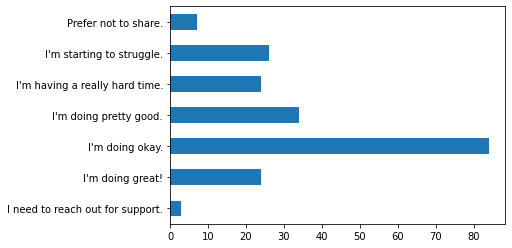

In [6]:
for col in df.columns[1:]:
    column = df.groupby([col]).size()
    if len(column) < 10:
        print(col)
        ax1 = column.plot.barh()
        y_axis = ax1.axes.get_yaxis()
        y_label = y_axis.get_label()
        y_label.set_visible(False)
        plt.show()

In [7]:
try:
    col = "Give a **specific** example/problem that you found difficult this week and explain _what_ made it challenging. What did you do to solve it? (Write `None` if this week's material was clear.)"
    df["labs"] = source.get_lab_nums(df[col])
    all_labs = {}
    for i in df["labs"]:
        for lab in i:
            all_labs[lab] = all_labs.get(lab,0) + 1
    print(all_labs)
except:
    print("No such column")

No such column


In [8]:
try:
    col = "Give a **specific** example/problem that you found difficult this week and explain _what_ made it challenging. What did you do to solve it? (Write `None` if this week's material was clear.)"
    concepts = ngrams.get_n_grams(df[col])
    print(concepts[:5])
except:
    print("No such column")

No such column


In [9]:
try:
    concepts2 = ngrams.get_n_grams(df["What _specific_ examples/concepts would you like Prof. K to demonstrate during the class next week? For example, how to check if a dictionary is empty / how to update an item in the dictionary. (Be as specific as possible. Write None if all is clear.)"])
    concepts2[:5]
except:
    print("There is no required column in this specific reflection")    

There is no required column in this specific reflection


In [10]:
try:
    col = 'What can be improved about your lab section? Please be as specific as possible. Write "Perfect" if nothing can be improved.'
    val = df[df[col] == "Perfect"][col].count()#
    print(f"We, {val} students, think labs were perfect")
except:
    print("There is no required column in this specific reflection")

There is no required column in this specific reflection


## Word cloud

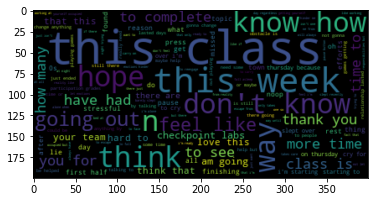

In [11]:
wordcloud = ngrams.get_words_cloud(df['Last question: any other thoughts or feedback?'])
plt.imshow(wordcloud, interpolation='bilinear')

## Sentiment analysis block

In [12]:
# get all scores from roberta model
df["last_santiment"] = roberta.get_scores_for([str(i) for i in df['Last question: any other thoughts or feedback?']])

#See how they came - neg, neu, pos
print("Example", df["last_santiment"].iloc[0])


Example [0.26753592 0.5459245  0.18653971]


In [ ]:
# padding issues - to slow algo, do not run
# df["last_santiment"] = roberta.get_scores([str(i) for i in df['Last question: any other thoughts or feedback?']])
# print("Example", df["last_santiment"].iloc[0])


In [13]:
# Apply the additinal rults for sorting
df["last_santiment_qua"] = df["last_santiment"].apply(lambda x: x[2] - x[0])
df["last_santiment_qua"] *= (df['Last question: any other thoughts or feedback?'].str.len() > 5)

In [14]:
#only negative
#df["last_santiment_qua"] = df["last_santiment"].apply(lambda x: x[0])

In [15]:
for i in df.sort_values(by=['last_santiment_qua'])['Last question: any other thoughts or feedback?']:
    if len(i) > 5 and "none" not in i.lower() and "nope" not in i.lower():
        print("-", i)

- Oh No I missed the first half of the class on Thursday because I slept over :(  I'm starting to cry for my participation grades
- I do not like how there are so many places to submit work, many other of the students have had this issue and I feel like the assignments are disorganized. There are random quiz dates and assignments due that it's hard to keep on top of things.
- one of the zybooks checkpoint labs (8.9.1) wouldn't let me submit anything and so I got marked off for no reason and got an 82.35% for week 8 checkpoint labs. I thought that was pretty unfair since it was purely on participation and I was able to do all the others.
- I am struggling 
- I just ended a relationship lasted 620 days and I really need some time, or maybe help. But I don't know how it could be helped. It's not gonna change anything by talking to people, the obstacle is still there. Going out, playing games, getting yourself occupied--but that only takes care of the day. Regardless of what I do in the da

In [16]:
val = (df["last_santiment_qua"] < 0)
print(f"We have {val.sum()}/{len(df)} negative comments")

We have 8/202 negative comments


In [ ]:

# LDA 

# latent variables models
# Conditional random field CRF

